# Deep Learning

In [1]:
# Boilerplate to chdir to project root and add projects sources to python path
import os
import sys
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
    sys.path.append(os.path.abspath('.'))

# Prepare the dataset
import biosignals.prepare as bp
if not bp.has_prepared('rand'):
    bp.prepare_rand()

In [2]:
import biosignals.deep_models as bdeep
# Test deep learning models (LSTM, GRU) so far
bdeep.test_deep_models()

Training model <class 'keras.layers.core.dense.Dense'> {} FeatureConfig(strategy=<Strategy.MULTI: 1>, use_pca=False, pca_components=64, extras=['eeg'])
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 512)            131584    
                                                                 
 activation (Activation)     (None, 1, 512)            0         
                                                                 
 dense_1 (Dense)             (None, 1, 256)            131328    
                                                                 
 dense_2 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 263,169
Trainable params: 263,169
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30


C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\sklearn\utils\extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\sklearn\utils\extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: in user code:

    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\jinke\Desktop\biosignals2\biosignals\env\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1, 1) vs (None,)).


# The rest of this notebook is redundant.

In [3]:
import biosignals.prepare as bp
import biosignals.evaluation as be
import biosignals.models as bm
from biosignals.split import Role
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, Activation
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [4]:
prepared = bp.read_prepared("rand")
print(prepared)

{<Role.TRAIN: 0>: [ParquetFrameLoader(path='prepared/rand\\train_0.parquet')], <Role.VALIDATE: 1>: [ParquetFrameLoader(path='prepared/rand\\validate_0.parquet')], <Role.TEST: 2>: [ParquetFrameLoader(path='prepared/rand\\test_0.parquet')]}


In [5]:
data = prepared[Role.TRAIN][0].load()
data_val = prepared[Role.VALIDATE][0].load()

Training model <class 'sklearn.ensemble._forest.RandomForestClassifier'> {} Strategy.COMBINED


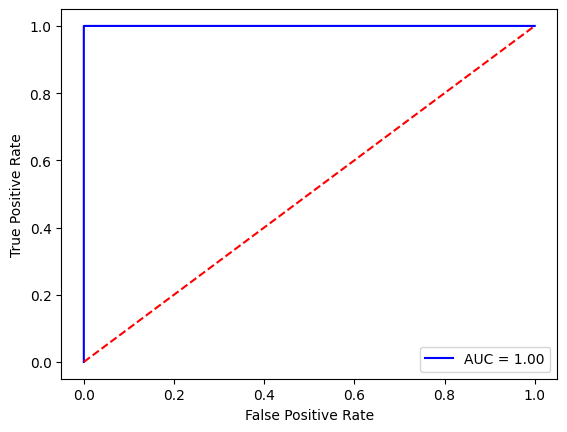

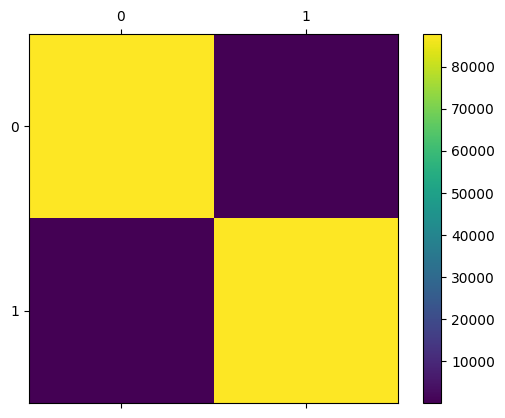

[[87873     1]
 [    2 87872]]
(0.9999829301692169, 0.9999829301044678, 0.9999829301044671, None)


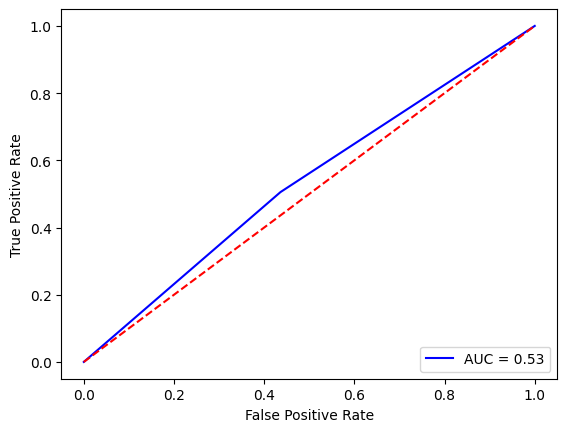

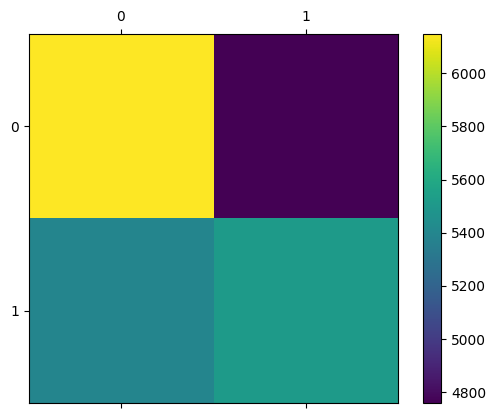

[[6150 4758]
 [5394 5514]]
(0.5347716740824218, 0.5346534653465347, 0.534257634417068, None)
Results(tn=6150, fp=4758, fn=5394, tp=5514)
accuracy 0.5346534653465347
Training model <class 'sklearn.ensemble._forest.RandomForestClassifier'> {} Strategy.MULTI


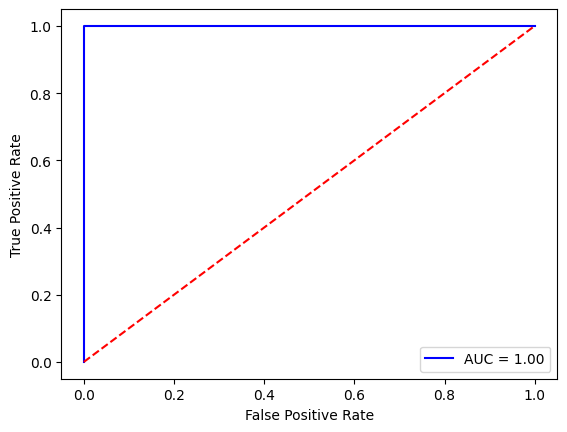

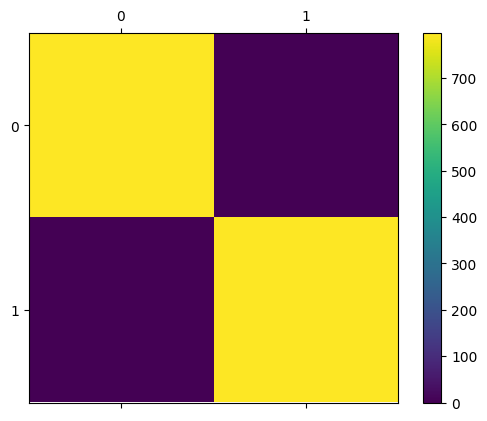

[[797   0]
 [  0 797]]
(1.0, 1.0, 1.0, None)


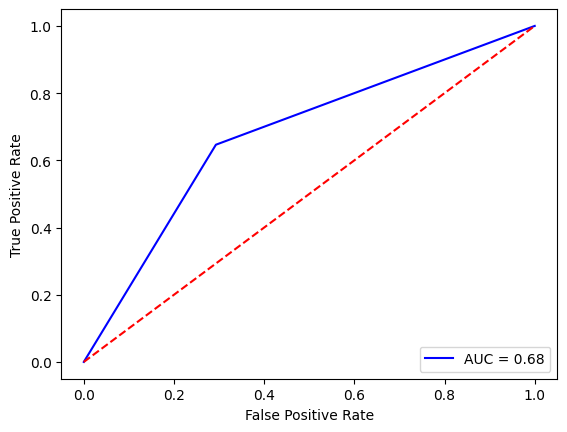

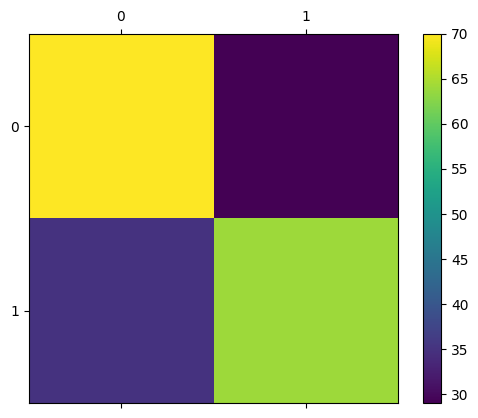

[[70 29]
 [35 64]]
(0.6774193548387097, 0.6767676767676768, 0.6764705882352942, None)
Results(tn=70, fp=29, fn=35, tp=64)
accuracy 0.6767676767676768


In [7]:
# Eric's Random Forest
bm.test_models()

In [7]:
from biosignals.models import *
# Hacky way to obtain the clustered data by abusing Eric's work...
data = bp.read_clusters()
model = bm.SkModel(RandomForestClassifier, {}, Strategy.MULTI)
lds = bp.read_prepared('rand')
data = model._load_all(lds[bs.Role.TRAIN], RandomState(42))
data_val = model._load_all(lds[bs.Role.VALIDATE], RandomState(42))
data_test = model._load_all(lds[bs.Role.TEST], RandomState(42))

Reading clusters


In [8]:
print(data[0].shape, data[1].shape, data_val[0].shape, data_val[1].shape, data_test[0].shape, data_test[1].shape)

(1594, 224) (1594,) (196, 224) (196,) (198, 224) (198,)


In [9]:
train_data = tf.convert_to_tensor(data[0], dtype=tf.float64)
train_labels = tf.convert_to_tensor(data[1], dtype=tf.int32)
print(train_labels.shape, train_data.shape)

val_data = tf.convert_to_tensor(data_val[0], dtype=tf.float64)
val_labels = tf.convert_to_tensor(data_val[1], dtype=tf.int32)

test_data = tf.convert_to_tensor(data_test[0], dtype=tf.float64)
test_labels = tf.convert_to_tensor(data_test[1], dtype=tf.int32)

(1594,) (1594, 224)


In [10]:
#standard scalar
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

#PCA
n_components = 64
pca = PCA(n_components=n_components)
pca.fit(train_data)
train_data_pca = pca.transform(train_data)
val_data_pca = pca.transform(val_data)
test_data_pca = pca.transform(test_data)


# Expand dimensions
train_data_pca = tf.expand_dims(train_data_pca, axis=1)
val_data_pca = tf.expand_dims(val_data_pca, axis=1)
test_data_pca = tf.expand_dims(test_data_pca, axis=1)

train_data_nopca = tf.expand_dims(train_data, axis=1)
val_data_nopca = tf.expand_dims(val_data, axis=1)
test_data_nopca = tf.expand_dims(test_data, axis=1)

print(train_data_pca.shape, val_data_pca.shape, test_data_pca.shape)
print(train_data_nopca.shape, val_data_nopca.shape, test_data_nopca.shape)

(1594, 1, 64) (196, 1, 64) (198, 1, 64)
(1594, 1, 224) (196, 1, 224) (198, 1, 224)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 512)            1133568   
                                                                 
 activation (Activation)     (None, 1, 512)            0         
                                                                 
 gru_1 (GRU)                 (None, 256)               591360    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,725,185
Trainable params: 1,725,185
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
25/25 [==============================] - 3s 16ms/step - loss: 0.7006 - accuracy: 0.5201
Epoch 2/30
25/25 [==============================] - 0s 15ms/step - loss: 0

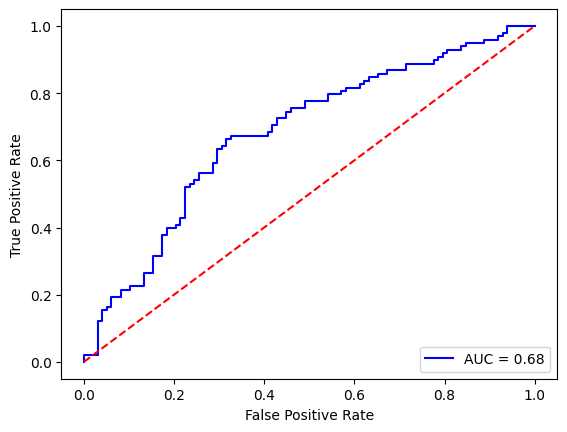

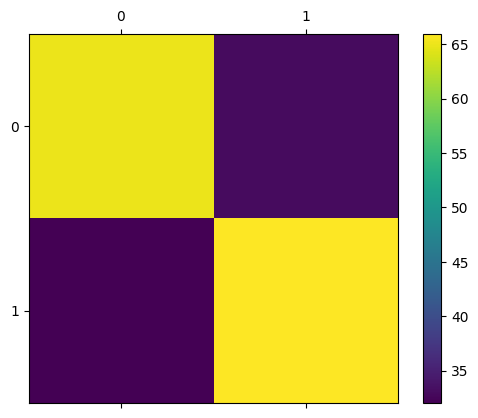

[[65 33]
 [32 66]]
(0.6683848797250859, 0.6683673469387754, 0.6683587140439932, None)


In [11]:
# GRU NO PCA
model_GRU_nopca = bdeep.GRU_Model(train_data_nopca, train_labels, num_epochs=30, batch_size=64)
be.evaluate_model(model_GRU_nopca.predict(val_data_nopca), val_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 512)            887808    
                                                                 
 activation_1 (Activation)   (None, 1, 512)            0         
                                                                 
 gru_3 (GRU)                 (None, 256)               591360    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,479,425
Trainable params: 1,479,425
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
25/25 [==============================] - 4s 18ms/step - loss: 0.6964 - accuracy: 0.5238
Epoch 2/30
25/25 [==============================] - 0s 15ms/step - loss:

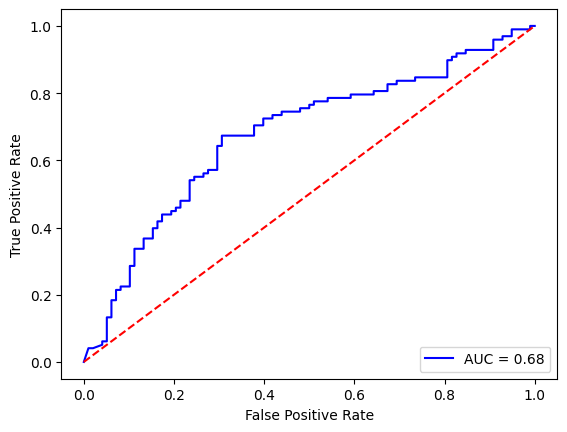

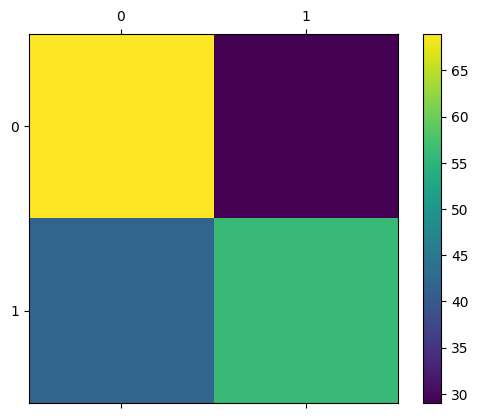

[[69 29]
 [42 56]]
(0.6402225755166931, 0.6377551020408163, 0.636154469631605, None)


In [12]:
# GRU WITH PCA
model_GRU_pca = bdeep.GRU_Model(train_data_pca, train_labels, num_epochs=30, batch_size=64)
be.evaluate_model(model_GRU_pca.predict(val_data_pca), val_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 512)            1509376   
                                                                 
 activation_2 (Activation)   (None, 1, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,297,089
Trainable params: 2,297,089
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
25/25 [==============================] - 3s 24ms/step - loss: 0.6958 - accuracy: 0.4912
Epoch 2/30
25/25 [==============================] - 1s 21ms/step - loss:

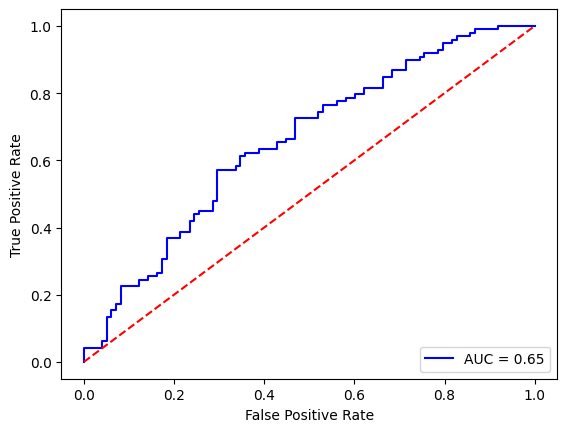

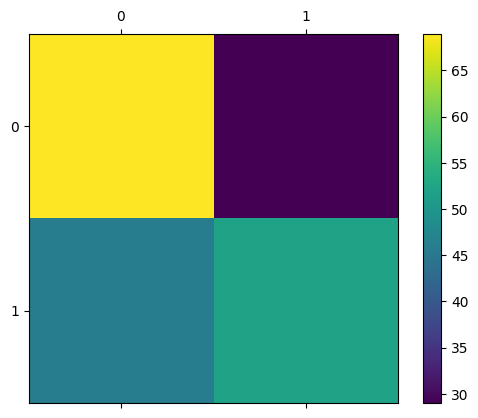

[[69 29]
 [46 52]]
(0.6209876543209876, 0.6173469387755102, 0.6144464552679205, None)


In [13]:
# LSTM NO PCA
model_LSTM_nopca = bdeep.LSTM_Model(train_data_nopca, train_labels, num_epochs=30, batch_size=64)
be.evaluate_model(model_LSTM_nopca.predict(val_data_nopca), val_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 512)            1181696   
                                                                 
 activation_3 (Activation)   (None, 1, 512)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               787456    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,969,409
Trainable params: 1,969,409
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
25/25 [==============================] - 3s 18ms/step - loss: 0.6941 - accuracy: 0.5107
Epoch 2/30
25/25 [==============================] - 0s 18ms/step - loss:

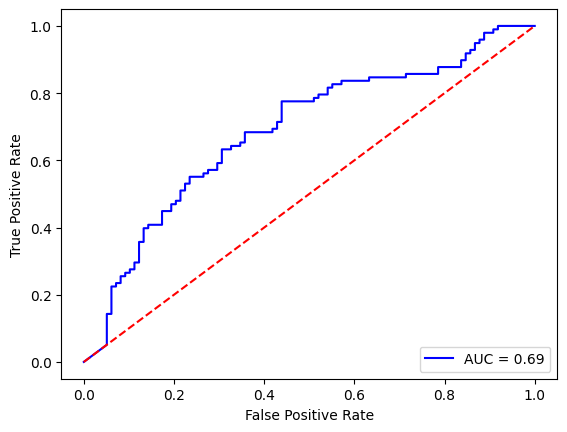

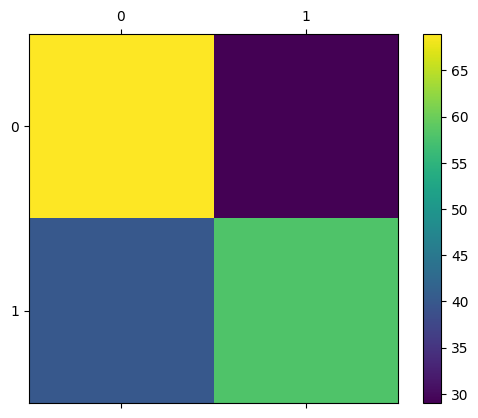

[[69 29]
 [40 58]]
(0.6498470948012232, 0.6479591836734694, 0.6468468468468469, None)


In [14]:
# LSTM WITH PCA
model_LSTM_pca = bdeep.LSTM_Model(train_data_pca, train_labels, num_epochs=30, batch_size=64)
be.evaluate_model(model_LSTM_pca.predict(val_data_pca), val_labels)

GRU - no PCA
7/7 [==============================] - 0s 4ms/step


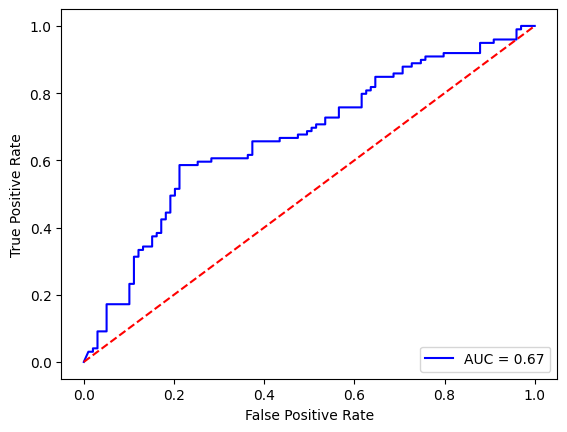

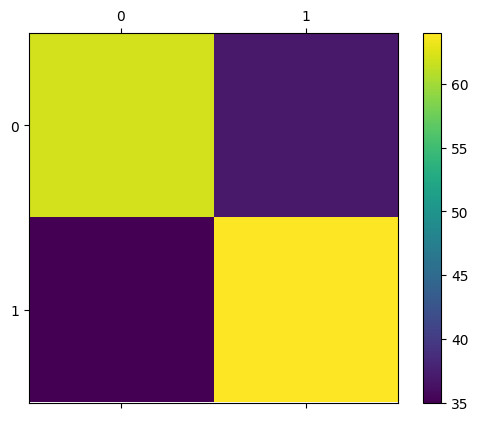

[[62 37]
 [35 64]]
(0.6364193120342962, 0.6363636363636365, 0.636326530612245, None)
GRU - with PCA
7/7 [==============================] - 0s 4ms/step


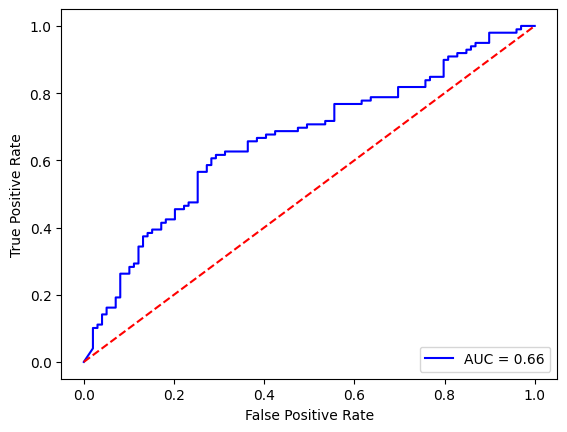

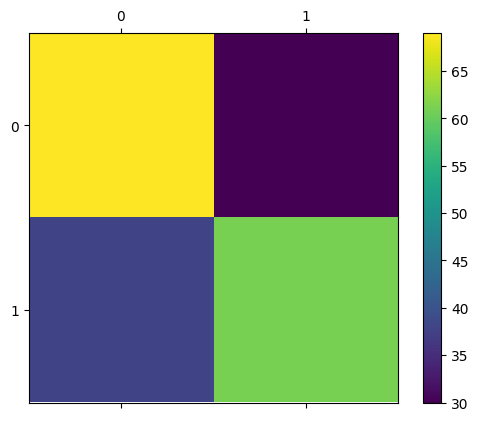

[[69 30]
 [38 61]]
(0.6575947417068913, 0.6565656565656566, 0.6560040878896269, None)
LSTM - no PCA
7/7 [==============================] - 0s 5ms/step


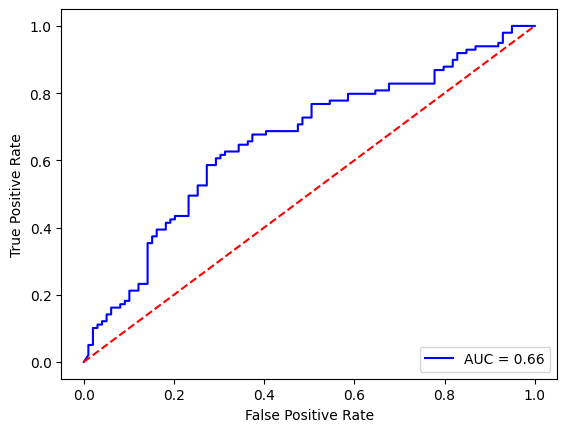

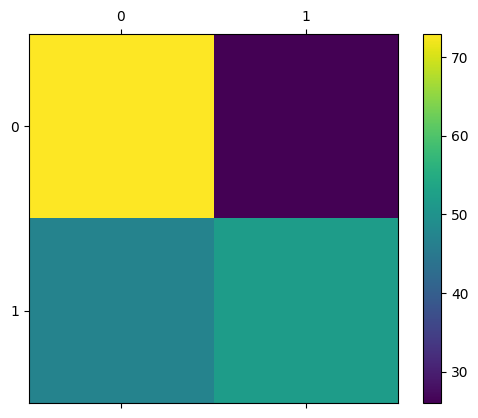

[[73 26]
 [47 52]]
(0.6375, 0.6313131313131313, 0.6271186440677965, None)
LSTM - with PCA
7/7 [==============================] - 0s 4ms/step


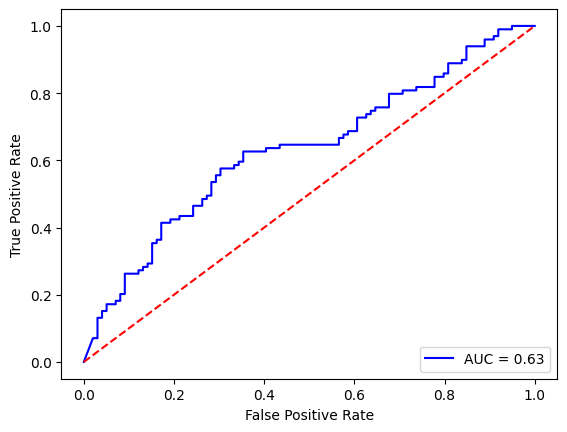

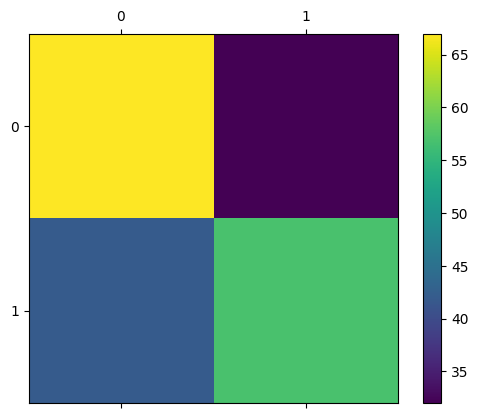

[[67 32]
 [42 57]]
(0.627564168642408, 0.6262626262626263, 0.6253068739770868, None)


In [15]:
# Test evaluation
print("GRU - no PCA")
be.evaluate_model(model_GRU_nopca.predict(test_data_nopca), test_labels)
print("GRU - with PCA")
be.evaluate_model(model_GRU_pca.predict(test_data_pca), test_labels)

print("LSTM - no PCA")
be.evaluate_model(model_LSTM_nopca.predict(test_data_nopca), test_labels)
print("LSTM - with PCA")
be.evaluate_model(model_LSTM_pca.predict(test_data_pca), test_labels)

GRU - no PCA
50/50 [==============================] - 0s 4ms/step


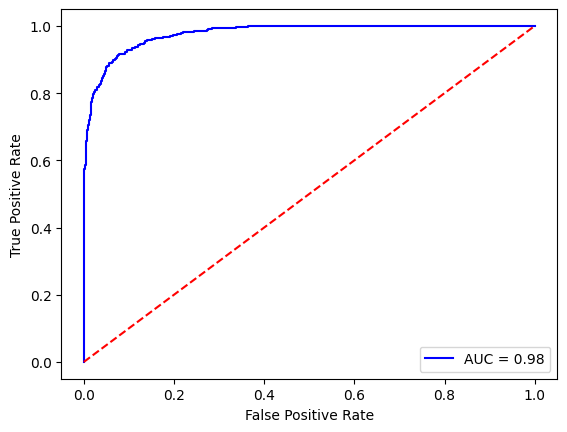

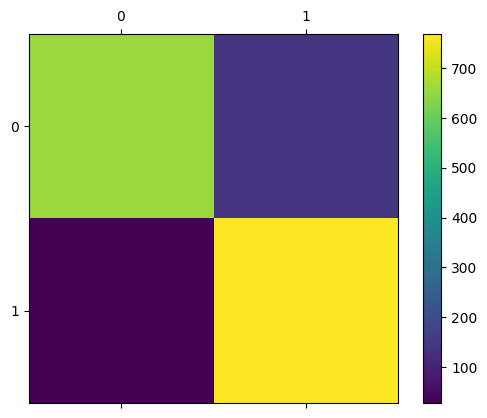

[[659 138]
 [ 28 769]]
(0.903546570503716, 0.8958594730238394, 0.8953611606747403, None)
GRU - PCA
50/50 [==============================] - 0s 4ms/step


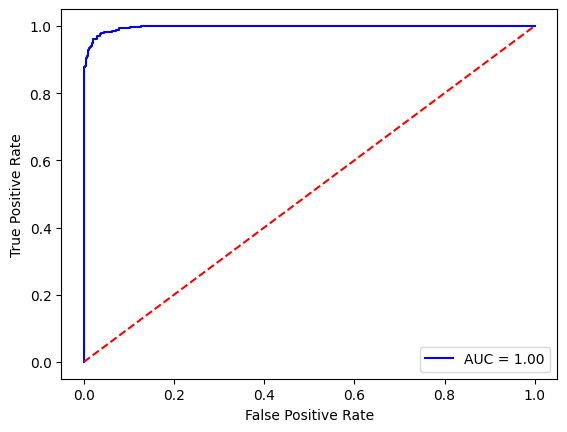

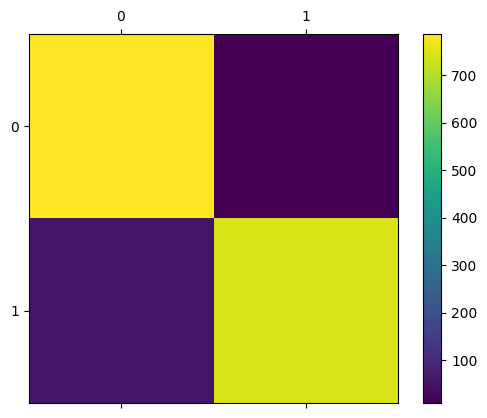

[[788   9]
 [ 54 743]]
(0.9619494491332693, 0.9604767879548306, 0.960445263550536, None)
LSTM - no PCA
50/50 [==============================] - 0s 5ms/step


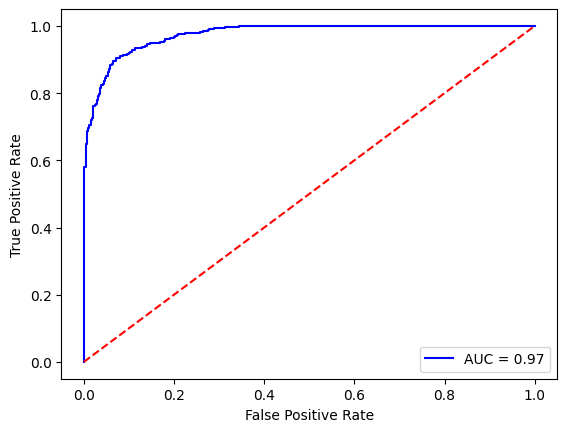

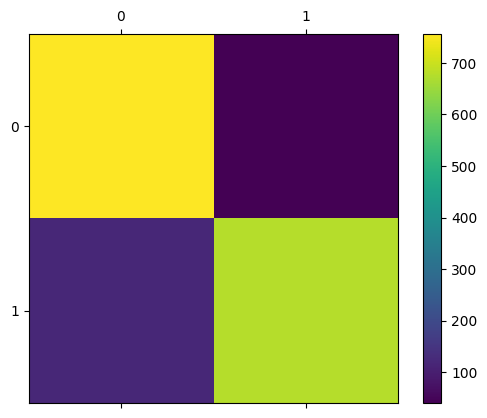

[[757  40]
 [119 678]]
(0.9042224723674337, 0.9002509410288582, 0.9000053262947335, None)
LSTM - PCA
50/50 [==============================] - 0s 4ms/step


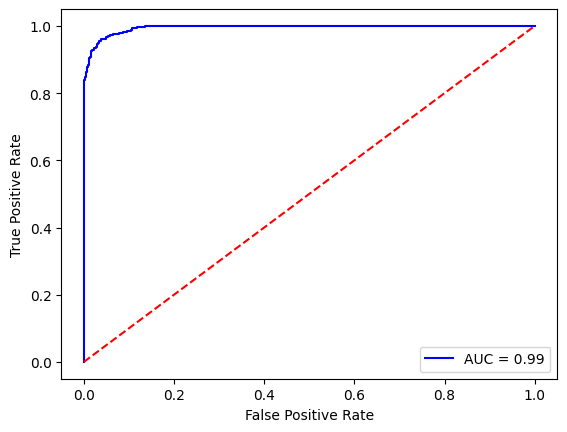

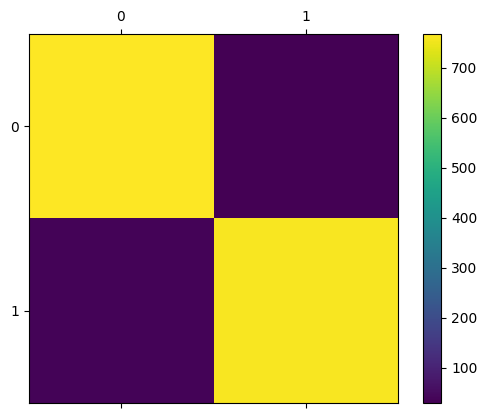

[[768  29]
 [ 35 762]]
(0.9598754984862392, 0.9598494353826851, 0.9598488664987406, None)


In [16]:
# Training evaluation (to see if we overfit)
print("GRU - no PCA")
be.evaluate_model(model_GRU_nopca.predict(train_data_nopca), train_labels)
print("GRU - PCA")
be.evaluate_model(model_GRU_pca.predict(train_data_pca), train_labels)
print("LSTM - no PCA")
be.evaluate_model(model_LSTM_nopca.predict(train_data_nopca), train_labels)
print("LSTM - PCA")
be.evaluate_model(model_LSTM_pca.predict(train_data_pca), train_labels)